In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from src.utils import CustomDataset
from src.utils import Data

from src.NN import FNN

Import data

In [2]:
### data file
file = "data/testData.csv"

### create dataframe
DataObj = Data(file)
df = DataObj.ImportData()

### define input (X) and output (y) data
X = np.array(df.X).reshape(-1,1)[:30000,:]
y = np.array(df.y).reshape(-1,1)[1:30001,:]

Visualize the data

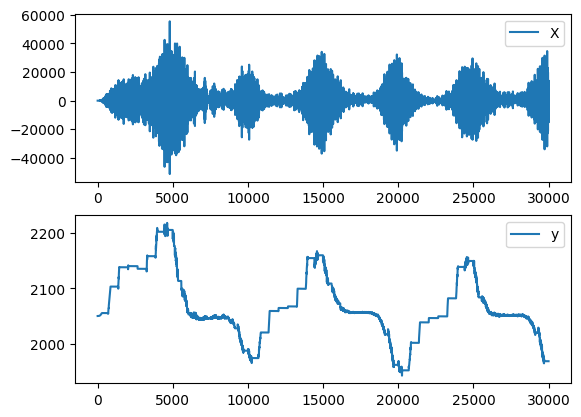

In [3]:
fig, ax = plt.subplots(2,1)

ax[0].plot(X.flatten(), label="X")
ax[0].legend()
ax[1].plot(y.flatten(), label="y")
ax[1].legend()

plt.show()

Normalize data

In [4]:
### normalize the training data
X = DataObj.Normalize(X)
y = DataObj.Normalize(y)

Train - test split

In [5]:
### data DD = {(X,U,D), Y}
X_train, y_train, X_test, y_test = DataObj.TrainTestSplit(X, y, frac=0.8)

Datasets in PyTorch format

In [6]:
### use the custom Pytorch Dataset generator to get train and test data
train_data = CustomDataset(X_train.reshape(-1,1), y_train.reshape(-1,1))
test_data = CustomDataset(X_test.reshape(-1,1), y_test.reshape(-1,1))

### use the generated train/test data and batch size to create DataLoader objects for the train and test (validataion) sets
batch_size = 5
trainloader = DataLoader(train_data, batch_size=batch_size, shuffle=False)
valloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

Define the model

In [7]:
### neural network parameters
in_dim = 1
hidden_dim = 256
out_dim = 1

### define the neural network
model = FNN(in_dim, out_dim, hidden_dim)

Parameters for training the model

In [8]:
### number of epochs
num_epochs = 30

### learning rate
learn_rate = 0.0001

### Define the loss function
# loss_func = Data.PINNLoss()
loss_func = nn.MSELoss()

### Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

Train the model

In [9]:
### Train the FNN model, monitor loss
loss_all = []
for i in range(num_epochs):
    l_tot = 0
    for X_train, y_train in  trainloader:
        
        ### TRAIN THE GENERATOR
        optimizer.zero_grad()

        y_pred = model(X_train)
        loss = loss_func(y_train, y_pred)

        loss.backward()

        optimizer.step()

        l_tot = l_tot + loss.detach()

    print(f"Epech {i} loss: {l_tot}")
    loss_all.append(l_tot)

Epech 0 loss: 1.098461627960205
Epech 1 loss: 0.8795821070671082
Epech 2 loss: 0.9585715532302856
Epech 3 loss: 1.082205891609192
Epech 4 loss: 1.1051172018051147
Epech 5 loss: 1.1758689880371094
Epech 6 loss: 1.2190481424331665
Epech 7 loss: 1.1864820718765259
Epech 8 loss: 1.2568625211715698
Epech 9 loss: 1.2855092287063599
Epech 10 loss: 1.3257994651794434
Epech 11 loss: 1.321394681930542
Epech 12 loss: 1.2968744039535522
Epech 13 loss: 1.3402605056762695
Epech 14 loss: 1.4036823511123657
Epech 15 loss: 1.5016815662384033
Epech 16 loss: 1.6295170783996582
Epech 17 loss: 1.8387868404388428
Epech 18 loss: 2.061948299407959
Epech 19 loss: 2.1745617389678955
Epech 20 loss: 2.5960850715637207
Epech 21 loss: 2.58319091796875
Epech 22 loss: 1.7512460947036743
Epech 23 loss: 1.6734426021575928
Epech 24 loss: 1.5642778873443604
Epech 25 loss: 1.5848445892333984
Epech 26 loss: 1.5960031747817993
Epech 27 loss: 1.6024805307388306
Epech 28 loss: 1.654280662536621
Epech 29 loss: 1.79910099506378

Plot the loss

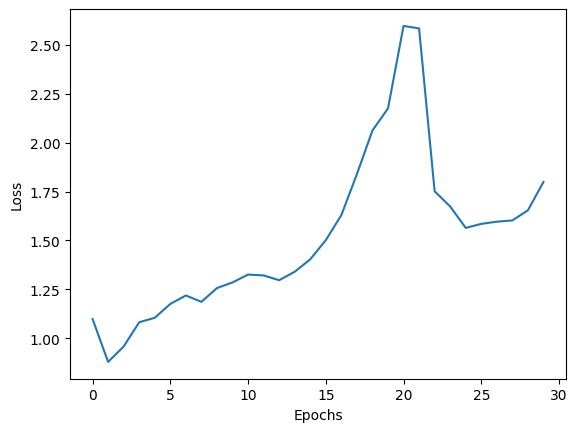

In [10]:
fig, ax = plt.subplots(1,1)

ax.plot(loss_all)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")

plt.show()

Test the model

In [11]:
capVolt_pred = np.array([])
capVolt_true = np.array([])
for X_test, y_test in  valloader:
    y_hat = model(X_test)

    capVolt_pred = np.concatenate((capVolt_pred, y_hat.detach().numpy().flatten()))
    capVolt_true = np.concatenate((capVolt_true, y_test.detach().numpy().flatten()))

Plot the results

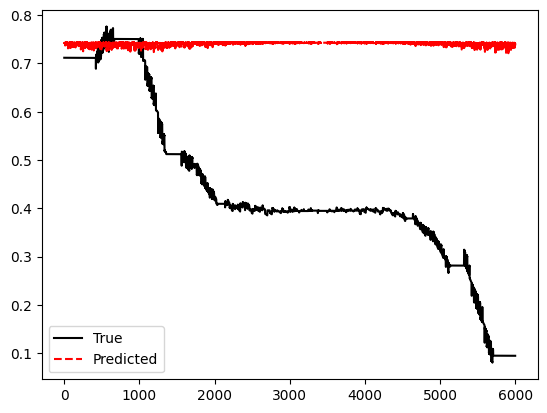

In [12]:
fig, ax = plt.subplots(1,1)

ax.plot(capVolt_true, "k-", label="True")
ax.plot(capVolt_pred, "r--", label="Predicted")
ax.legend()

plt.show()